In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [3]:
# Загрузка датасета breast_cancer
data = datasets.load_breast_cancer()

In [5]:
# Выделение первых двух столбцов и целевой переменной
X = data.data[:, :2]
y = data.target

In [7]:
# Создание DataFrame и вывод распределения целевой переменной
df = pd.DataFrame(data.data[:, :2], columns=data.feature_names[:2])
df['target'] = data.target
print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


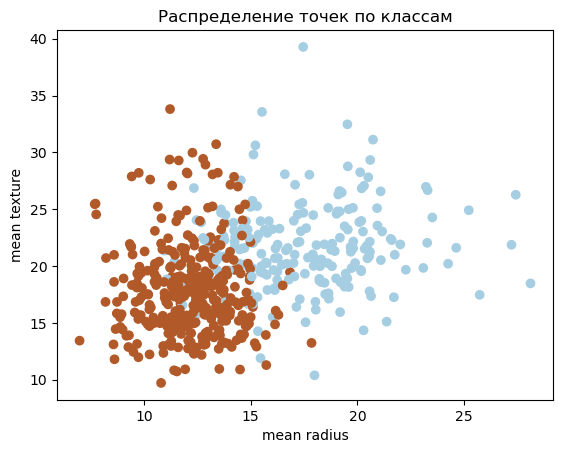

In [9]:
# Визуализация распределения точек
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Распределение точек по классам')
plt.show()

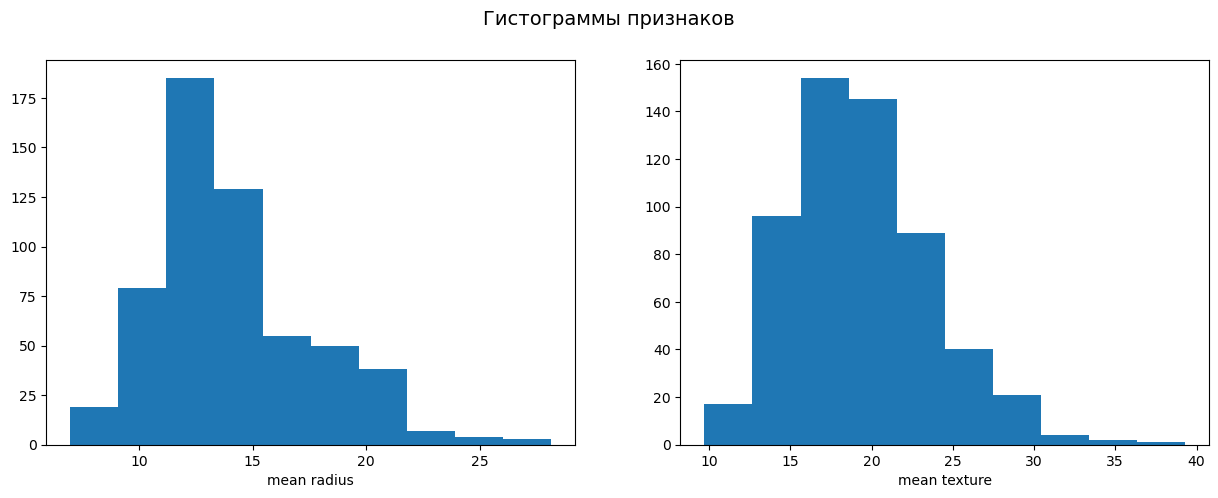

In [11]:
# Построение гистограмм для первых двух признаков
plt.figure(figsize=(15, 5))
for i in range(2):    
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков', fontsize=14)
plt.show()

In [13]:
# Создание и обучение модели на первых двух признаках
gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)

# Предсказание и оценка качества
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy=', accuracy_score(y, y_pred))
print('F1_score=', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy= 0.8857644991212654
F1_score= 0.912751677852349


In [15]:
# Обучение модели на всех признаках
X = data.data
y = data.target
gaussian_nb.fit(X, y)

# Оценка качества
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy=', accuracy_score(y, y_pred))
print('F1_score=', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy= 0.9420035149384886
F1_score= 0.9546079779917469


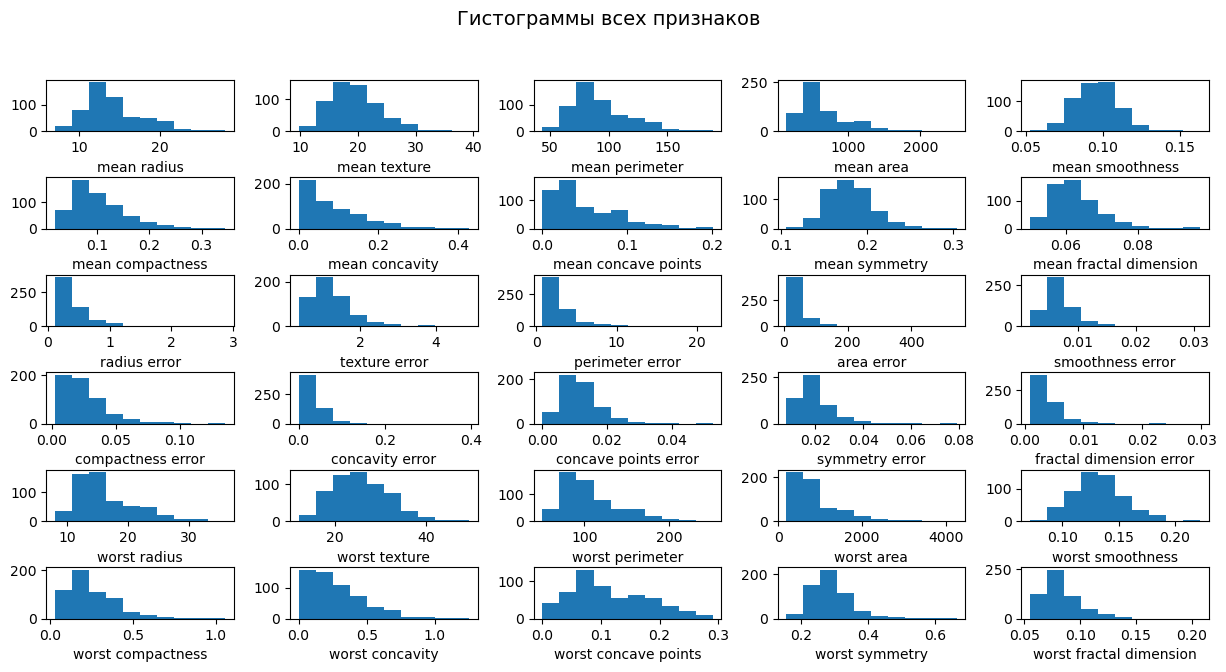

In [17]:
# Визуализация гистограмм всех признаков
plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.subplots_adjust(hspace=0.9, wspace=0.3)    
plt.suptitle('Гистограммы всех признаков', fontsize=14)
plt.show()

In [19]:
# Удаление признаков с ненормальным распределением
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df = df.drop(['mean concavity', 'radius error', 'perimeter error', 'area error', 
              'compactness error', 'concavity error', 'fractal dimension error', 
              'worst area', 'worst concavity'], axis=1)

# Обучение модели на отобранных признаках
X_selected = df.drop('target', axis=1).values
y = df['target'].values
gaussian_nb.fit(X_selected, y)

# Оценка качества
y_pred = gaussian_nb.predict(X_selected)
print(confusion_matrix(y, y_pred))
print('Accuracy=', accuracy_score(y, y_pred))
print('F1_score=', f1_score(y, y_pred))

[[196  16]
 [ 15 342]]
Accuracy= 0.945518453427065
F1_score= 0.9566433566433566


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    0  22.0      1      0   7.2500   
1            2         1       1    1  38.0      1      0  71.2833   
2            3         1       3    1  26.0      0      0   7.9250   
3            4         1       1    1  35.0      1      0  53.1000   
4            5         0       3    0  35.0      0      0   8.0500   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 no

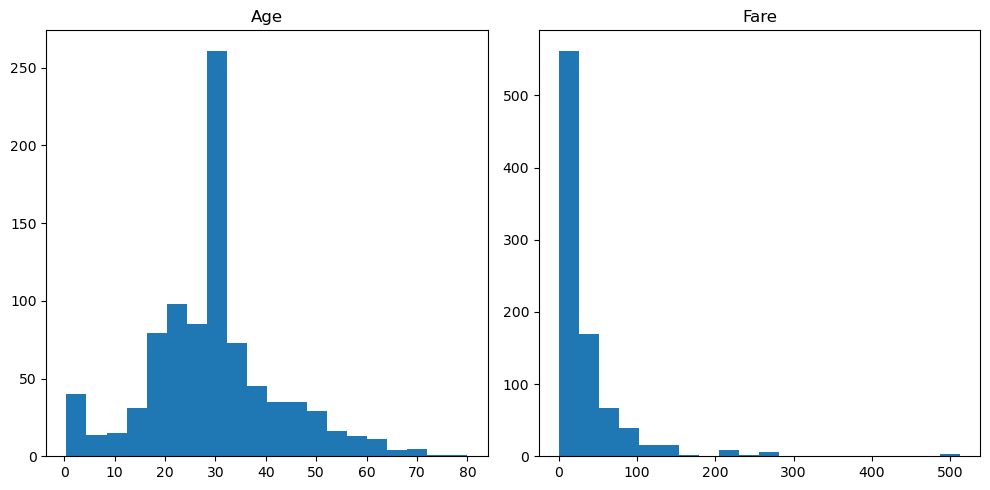

In [23]:
# Работа с датасетом Titanic
titanic_df = pd.read_csv('C:/users/senpai_sqrt2/Desktop/Uni/3rd course/ML/ML_course/ML3.6 bayes/data/titanic.csv')

# Просмотр первых строк датасета
print(titanic_df.head())

# Описание датасета
print(titanic_df.info())

# Визуализация распределения числовых признаков
numeric_features = ['Age', 'Fare']
plt.figure(figsize=(10, 5))
for i, feature in enumerate(numeric_features):
    plt.subplot(1, 2, i+1)
    plt.hist(titanic_df[feature].dropna(), bins=20)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [25]:
# Подготовка данных для моделирования (пример)
X_titanic = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y_titanic = titanic_df['Survived']

# Заполнение пропущенных значений
X_titanic['Age'].fillna(X_titanic['Age'].median(), inplace=True)

# Создание и обучение модели
nb_titanic = GaussianNB()
nb_titanic.fit(X_titanic, y_titanic)

# Оценка качества
y_pred_titanic = nb_titanic.predict(X_titanic)
print(confusion_matrix(y_titanic, y_pred_titanic))
print('Accuracy:', accuracy_score(y_titanic, y_pred_titanic))
print('F1 score:', f1_score(y_titanic, y_pred_titanic))

[[467  82]
 [202 140]]
Accuracy: 0.6812570145903479
F1 score: 0.49645390070921985


C:\Users\senpai_sqrt2\AppData\Local\Temp\ipykernel_12744\3718865524.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_titanic['Age'].fillna(X_titanic['Age'].median(), inplace=True)
C:\Users\senpai_sqrt2\AppData\Local\Temp\ipykernel_12744\3718865524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_titanic['Age'].fillna(X_titanic['Age']